In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import json
import gc
import csv

from scipy.stats import uniform

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./dataset/train.csv')
df.size

10843836

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [3]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

With basic analysis of data, we can see two types of features(fields): number and object

In [6]:
number_features = df.select_dtypes(include = np.number).columns
df[number_features]

,date,visitId,visitNumber,visitStartTime
0,20160902,1472830385,1,1472830385
1,20160902,1472880147,1,1472880147
2,20160902,1472865386,1,1472865386
3,20160902,1472881213,1,1472881213
4,20160902,1472822600,2,1472822600
...,...,...,...,...
903648,20170104,1483554750,1,1483554750
903649,20170104,1483543798,1,1483543798
903650,20170104,1483526434,1,1483526434
903651,20170104,1483592857,1,1483592864


In [7]:
object_features = df.select_dtypes(exclude = np.number).columns
df[object_features]

,channelGrouping,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource
0,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ..."
1,Organic Search,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ..."
2,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ..."
3,Organic Search,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ..."
4,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ..."
...,...,...,...,...,...,...,...,...
903648,Social,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5123779100307500332,"{""continent"": ""Americas"", ""subContinent"": ""Car...",5123779100307500332_1483554750,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""15...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n..."
903649,Social,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7231728964973959842,"{""continent"": ""Asia"", ""subContinent"": ""Souther...",7231728964973959842_1483543798,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""18"", ""pageviews"": ""13...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n..."
903650,Social,"{""browser"": ""Android Webview"", ""browserVersion...",5744576632396406899,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",5744576632396406899_1483526434,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""21...","{""referralPath"": ""/yt/about/ko/"", ""campaign"": ..."
903651,Social,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2709355455991750775,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",2709355455991750775_1483592857,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""22...","{""referralPath"": ""/l.php"", ""campaign"": ""(not s..."


We can see that there are 4 objects data in string and 4 in JSON format(device, channelGrouping, totals, trafficSource). For string, there is no problem. For JSON format, we have to split them which consequently create new features:

In [9]:
df[object_features].device.unique()[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [14]:
df[object_features].geoNetwork.unique()

array(['{"continent": "Asia", "subContinent": "Western Asia", "country": "Turkey", "region": "Izmir", "metro": "(not set)", "city": "Izmir", "cityId": "not available in demo dataset", "networkDomain": "ttnet.com.tr", "latitude": "not available in demo dataset", "longitude": "not available in demo dataset", "networkLocation": "not available in demo dataset"}',
       '{"continent": "Oceania", "subContinent": "Australasia", "country": "Australia", "region": "not available in demo dataset", "metro": "not available in demo dataset", "city": "not available in demo dataset", "cityId": "not available in demo dataset", "networkDomain": "dodo.net.au", "latitude": "not available in demo dataset", "longitude": "not available in demo dataset", "networkLocation": "not available in demo dataset"}',
       '{"continent": "Europe", "subContinent": "Southern Europe", "country": "Spain", "region": "Community of Madrid", "metro": "(not set)", "city": "Madrid", "cityId": "not available in demo dataset", "

In total feature, we can see there is the target "transactionRevenue" feature which is the key variable of the Exploration process

In [11]:
df[object_features].totals.unique()

array(['{"visits": "1", "hits": "1", "pageviews": "1", "bounces": "1", "newVisits": "1"}',
       '{"visits": "1", "hits": "1", "pageviews": "1", "bounces": "1"}',
       '{"visits": "1", "hits": "2", "pageviews": "2", "newVisits": "1"}',
       ...,
       '{"visits": "1", "hits": "130", "pageviews": "90", "transactionRevenue": "69390000"}',
       '{"visits": "1", "hits": "188", "pageviews": "116"}',
       '{"visits": "1", "hits": "237", "pageviews": "169", "transactionRevenue": "74990000"}'],
      dtype=object)

In [12]:
df[object_features].trafficSource.unique()

array(['{"campaign": "(not set)", "source": "google", "medium": "organic", "keyword": "(not provided)", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}',
       '{"campaign": "(not set)", "source": "google", "medium": "organic", "keyword": "google + online", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}',
       '{"campaign": "(not set)", "source": "google", "medium": "organic", "keyword": "(not provided)", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}, "isTrueDirect": true}',
       ...,
       '{"campaign": "AW - Dynamic Search Ads Whole Site", "source": "google", "medium": "cpc", "keyword": "6qEhsCssdK0z36ri", "adwordsClickInfo": {"page": "1", "slot": "Top", "criteriaParameters": "not available in demo dataset", "gclId": "CPi135HaqdECFYtKDQodGWYG0g", "adNetworkType": "Google Search", "isVideoAd": false}, "isTrueDirect": true}',
       '{"campaign": "AW - Dynamic Search Ads Whole Site", "source"

I adapt load_csv function which is in kaggle for split JSON objects into new features. We will take a sample of 500000 users from 10843836 users

In [13]:
def load_csv(csv_path, nrows=None, skiprows=None):
    json_cols = ['device', 'geoNetwork', 'totals', 'trafficSource']
    df = pd.read_csv(csv_path,
                     converters = {col: json.loads for col in json_cols},
                     dtype={'fullVisitorId': 'str'},
                     nrows=nrows,
                     skiprows=skiprows)
    
    for col in json_cols:
        normalized_col_df = pd.json_normalize(df[col])
        df = pd.concat([df.drop(columns=col), normalized_col_df], axis=1)
    return df

In [16]:
train_df = load_csv('./dataset/train.csv', nrows=500000)

In [18]:
train_df.size, train_df.shape

(27500000, (500000, 55))

Now we have 55 columns to analyse

In [19]:
train_df.dtypes

channelGrouping                        object
date                                    int64
fullVisitorId                          object
sessionId                              object
socialEngagementType                   object
visitId                                 int64
visitNumber                             int64
visitStartTime                          int64
browser                                object
browserVersion                         object
browserSize                            object
operatingSystem                        object
operatingSystemVersion                 object
isMobile                                 bool
mobileDeviceBranding                   object
mobileDeviceModel                      object
mobileInputSelector                    object
mobileDeviceInfo                       object
mobileDeviceMarketingName              object
flashVersion                           object
language                               object
screenColors                      

In [20]:
train_df.head(10)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Organic Search,20160902,2938943183656635653,2938943183656635653_1472807194,Not Socially Engaged,1472807194,1,1472807194,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Organic Search,20160902,1905672039242460897,1905672039242460897_1472817241,Not Socially Engaged,1472817241,1,1472817241,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Organic Search,20160902,537222803633850821,537222803633850821_1472812602,Not Socially Engaged,1472812602,1,1472812602,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Organic Search,20160902,4445454811831400414,4445454811831400414_1472805784,Not Socially Engaged,1472805784,1,1472805784,Internet Explorer,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Organic Search,20160902,9499785259412240342,9499785259412240342_1472812272,Not Socially Engaged,1472812272,1,1472812272,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Let's create a more detailed table for our features

# Create an empty list to store the output data
def explore_dataset(df):
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 30:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [25]:
output_df = explore_dataset(train_df)

In [26]:
output_df

,Column Name,Number of Unique Values,Unique Values,Data Type
0,channelGrouping,8,"[Organic Search, Referral, Paid Search, Affili...",object
1,date,197,-,int64
2,fullVisitorId,415210,-,object
3,sessionId,499746,-,object
4,socialEngagementType,1,[Not Socially Engaged],object
5,visitId,490427,-,int64
6,visitNumber,336,-,int64
7,visitStartTime,490650,-,int64
8,browser,48,-,object
9,browserVersion,1,[not available in demo dataset],object


### 1. Null values

In [28]:
null_finder = train_df.isnull().sum()

In [29]:
print(" ***** Number of Null Values by row: ***** ")
null_finder.where(null_finder > 0).dropna()

 ***** Number of Null Values by row: ***** 


pageviews                             51.0
bounces                           251307.0
newVisits                         110443.0
transactionRevenue                493575.0
keyword                           285423.0
isTrueDirect                      351027.0
referralPath                      306892.0
adwordsClickInfo.page             488363.0
adwordsClickInfo.slot             488363.0
adwordsClickInfo.gclId            488282.0
adwordsClickInfo.adNetworkType    488363.0
adwordsClickInfo.isVideoAd        488363.0
adContent                         494194.0
campaignCode                      499999.0
dtype: float64

In [36]:
null_finder.where(null_finder > 60000).dropna().index

Index(['bounces', 'newVisits', 'transactionRevenue', 'keyword', 'isTrueDirect',
       'referralPath', 'adwordsClickInfo.page', 'adwordsClickInfo.slot',
       'adwordsClickInfo.gclId', 'adwordsClickInfo.adNetworkType',
       'adwordsClickInfo.isVideoAd', 'adContent', 'campaignCode'],
      dtype='object')

In [ ]:

# Open file 
with open('./dataset/train.csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    i=0
    for row in reader_obj:
        print(row)
        if i==5:
            break
        i+=1    

### 2. Cleaning Null/NaN values

In [37]:
train_df.pageviews.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '20', '19', '21', '25', '22',
       '26', '23', '24', '30', '27', '29', '28', '32', '31', '34', '33',
       '38', '35', '40', '36', '37', '39', '43', '45', '47', '52', '44',
       '50', '46', '49', '51', '56', '59', '71', '57', '82', '84', '92',
       '90', '41', '79', '138', '48', '69', '112', '42', '65', '60', '63',
       '68', '58', '74', '165', '53', '54', '55', '61', '70', '80', '78',
       '72', '188', '73', '62', '75', '86', '197', '148', '67', '102',
       '64', '103', '144', nan, '81', '119', '104', '128', '87', '111',
       '66', '83', '135', '94', '91', '99', '77', '118', '202', '127',
       '93', '106', '155', '117', '76', '89', '85', '143', '105', '115',
       '95', '110', '137', '120', '116', '208', '126', '400', '101',
       '108', '333', '97', '96', '98', '125', '113', '327', '154', '121',
       '183', '123', '141', '224', '88', '195', '343', '156

In [41]:
train_df.newVisits.unique()

array(['1', nan], dtype=object)

In [48]:
train_df.referralPath.unique()

array([nan, '/', '/corp/google.com/study/incentives/working-with-perks',
       ..., '/tagger', '/pEnXcP0CYj', '/FMOMesSKJm'], dtype=object)

In [60]:
def clean_up(df):
    null_finder = train_df.isnull().sum()
    nan_features = null_finder.where(null_finder > 400000).dropna().index.drop('transactionRevenue')
    print(nan_features)
    df = df.drop(columns=nan_features)
    df["transactionRevenue"] = df["transactionRevenue"].fillna(0).astype(int)
    df["pageviews"] = df["pageviews"].fillna(0).astype(int)
    df["newVisits"] = df["newVisits"].fillna(0).astype(int)
    df["bounces"] = df["bounces"].fillna(0).astype(int)
    df["keyword"] = df["keyword"].fillna("empty")
    df["isTrueDirect"] = df["isTrueDirect"].fillna("False")
    df["referralPath"] = df["referralPath"].fillna("empty")   

        
    return df

In [61]:
train_df = clean_up(train_df)

Index([], dtype='object')


After cleaning, dataset has 48 features:

In [62]:
train_df.head(10)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,1,1,0,(not set),google,organic,(not provided),not available in demo dataset,False,empty
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,1,1,0,(not set),google,organic,(not provided),not available in demo dataset,False,empty
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,1,1,0,(not set),google,organic,(not provided),not available in demo dataset,False,empty
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,1,1,0,(not set),google,organic,google + online,not available in demo dataset,False,empty
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,1,0,0,(not set),google,organic,(not provided),not available in demo dataset,True,empty
5,Organic Search,20160902,2938943183656635653,2938943183656635653_1472807194,Not Socially Engaged,1472807194,1,1472807194,Chrome,not available in demo dataset,...,1,1,0,(not set),google,organic,(not provided),not available in demo dataset,False,empty
6,Organic Search,20160902,1905672039242460897,1905672039242460897_1472817241,Not Socially Engaged,1472817241,1,1472817241,Chrome,not available in demo dataset,...,1,1,0,(not set),google,organic,(not provided),not available in demo dataset,False,empty
7,Organic Search,20160902,537222803633850821,537222803633850821_1472812602,Not Socially Engaged,1472812602,1,1472812602,Chrome,not available in demo dataset,...,1,1,0,(not set),google,organic,(not provided),not available in demo dataset,False,empty
8,Organic Search,20160902,4445454811831400414,4445454811831400414_1472805784,Not Socially Engaged,1472805784,1,1472805784,Internet Explorer,not available in demo dataset,...,1,1,0,(not set),google,organic,(not provided),not available in demo dataset,False,empty
9,Organic Search,20160902,9499785259412240342,9499785259412240342_1472812272,Not Socially Engaged,1472812272,1,1472812272,Firefox,not available in demo dataset,...,1,1,0,(not set),google,organic,(not provided),not available in demo dataset,False,empty


### 3. Target variable analysis

In [66]:
train_df[["campaign"]].groupby("campaign").size()

campaign
(not set)                                          479175
AW - Accessories                                     3654
AW - Apparel                                           30
AW - Dynamic Search Ads Whole Site                   7896
AW - Electronics                                       56
All Products                                            1
Data Share Promo                                     8899
Retail (DO NOT EDIT owners nophakun and tianyu)        40
test-liyuhz                                           249
dtype: int64

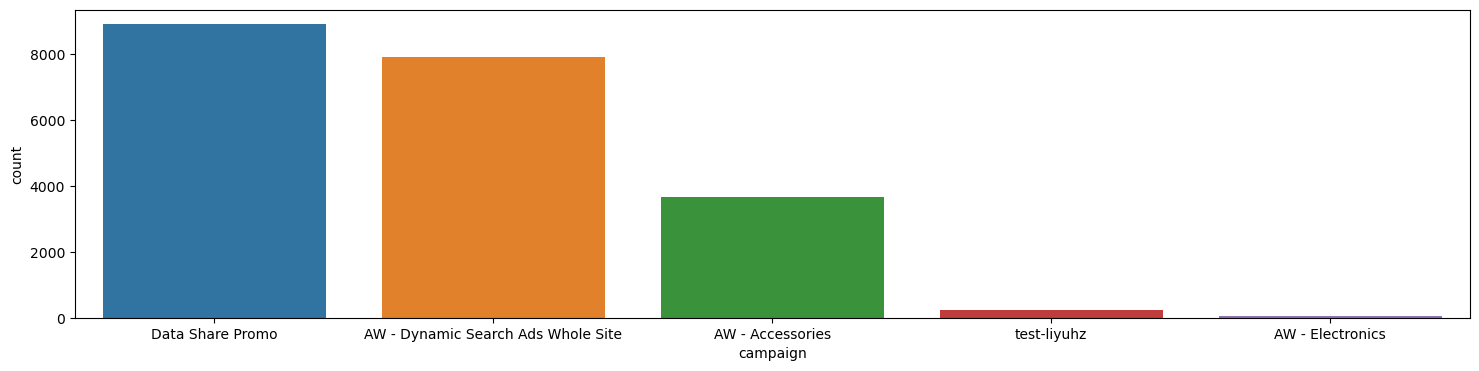

In [67]:
country_counts = train_df[["campaign"]].groupby("campaign").size().sort_values(ascending=False)[1:6]
country_counts = country_counts.reset_index()
country_counts.columns = ["campaign", "count"]

plt.figure(figsize=(18,4))
sns.barplot(data=country_counts, x="campaign", y="count")
plt.show()

In [ ]:
transactionRevenue

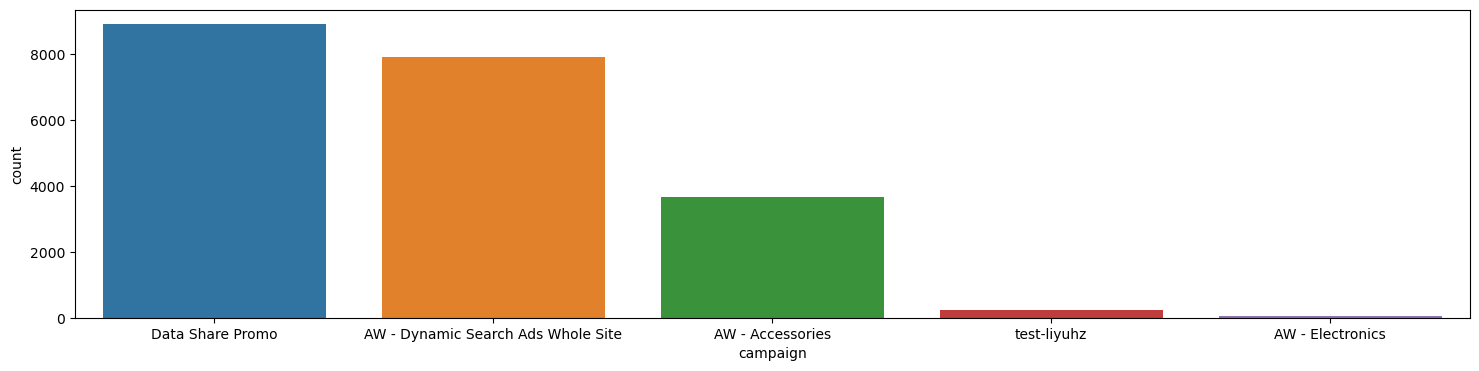

In [55]:
country_counts = train_df[["campaign"]].groupby("campaign").size().sort_values(ascending=False)[1:6]
country_counts = country_counts.reset_index()
country_counts.columns = ["campaign", "count"]

plt.figure(figsize=(18,4))
sns.barplot(data=country_counts, x="campaign", y="count")
plt.show()

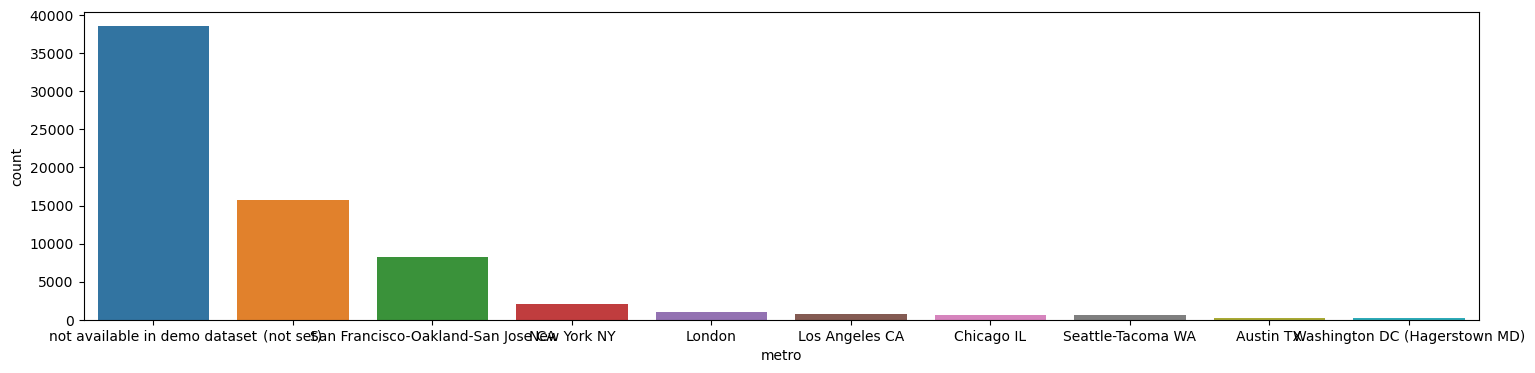

In [111]:
country_counts = train_df[["metro"]].groupby("metro").size().sort_values(ascending=False)[:10]
country_counts = country_counts.reset_index()
country_counts.columns = ["metro", "count"]

plt.figure(figsize=(18,4))
sns.barplot(data=country_counts, x="metro", y="count")
plt.show()

In [112]:
top_countries = train_df[["country"]].groupby("country").size().sort_values(ascending=False)[:20].index.to_numpy()
train_df_top_countries = train_df[train_df["country"].isin(top_countries)]

plt.figure(figsize=(18,4))
sns.stripplot(data=train_df_top_countries, x="country", y="totalTransactionRevenue")
plt.show()

ValueError: Could not interpret input 'totalTransactionRevenue'

<Figure size 1800x400 with 0 Axes>

In [39]:
def feature_extraction(df):
    agg_df = df.groupby("fullVisitorId")["newVisits", "pageviews"].agg(
        newVisits_sum = ("newVisits", "sum"),
        pageviews_sum = ("pageviews", "sum"),
        pageviews_mean = ("pageviews", "mean"),
        pageviews_std = ("pageviews", "std"),
    ).reset_index()
    agg_df["pageviews_std"] = agg_df["pageviews_std"].fillna(0)
    df = pd.merge(df, agg_df, on="fullVisitorId", suffixes=("", ""))
    return df

train_df = feature_extraction(train_df)

In [40]:
plt.figure(figsize=(18,4))
sns.stripplot(data=train_df, x="pageviews_std", y="totalTransactionRevenue")
plt.show()

ValueError: Could not interpret input 'totalTransactionRevenue'

<Figure size 1800x400 with 0 Axes>

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   channelGrouping                      10000 non-null  object 
 1   date                                 10000 non-null  int64  
 2   fullVisitorId                        10000 non-null  object 
 3   sessionId                            10000 non-null  object 
 4   socialEngagementType                 10000 non-null  object 
 5   visitId                              10000 non-null  int64  
 6   visitNumber                          10000 non-null  int64  
 7   visitStartTime                       10000 non-null  int64  
 8   browser                              10000 non-null  object 
 9   browserVersion                       10000 non-null  object 
 10  browserSize                          10000 non-null  object 
 11  operatingSystem              

# Data Understanding:

We have data from Google Merchandising Store https://shop.googlemerchandisestore.com/. This data was collected using Google Analytics API. The dataset was taken from kaggle GA challenge https://www.kaggle.com/competitions/ga-customer-revenue-prediction.

As I can see, the data from this Kaggle challenge was collected from Google Merchandising Store by Google Analytics API. And the object is to predict the revenue by customer. The object for this exploration and modelling is to predict revenue per customer. So the target variable is revenue. What am I predicting? We are predicting the natural log of the sum of all transactions per user. Once the data is updated, as noted above, this will be for all users in test_v2.csv for December 1st, 2018 to January 31st, 2019.

At the begging of each data exploration, we have to understand the data we have and create which questions we have to answer. First part, we just need to check the source of the data: It is an store which sell different kind of products like sunglasess, cups, etc. This data is in JSON format and is contatenated in different subfields. For more details, we can take a look to GA4.

Here a brief description of the fields we have the data:
- fullVisitorId - A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store. (JSON format)
- geoNetwork - This section contains information about the geography of the user. (JSON format)
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session. (JSON format)
- trafficSource - This section contains information about the Traffic Source from which the session originated. (JSON format)
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.
- totals - This set of columns mostly includes high-level aggregate data.


For the second part, about questions we have the following ones:

1. For each fullVisitorId(user), we have to calculate how many transactions they made?
2. Which is the country that made more transactions?
3. Which is channelGroup made more transactions?
4. Which is device that made more transactions?

Which Univariate analysis we can do for revenue variable? Yes, but we also can univariate analysis to other variables like fullvisitorID, devices, webBrowsers, Operative system, traffic source, date, page views, etc.

Which Multivariate analysis we can do for revenue and other variables?
correlation and 



# Which Questions to answer?
1. Reference: https://www.kaggle.com/code/zikangye9/fork-of-ds-for-business-project-g43 (Only have EDA)
- Select the top 10 countries with most transcation records 
- Select the top 10 cities with most transcation records
- Select the top 10 regions with most transcation records
2. Reference: https://www.kaggle.com/code/oceands/basics-of-google-analytics ( It has the complete model form EDA to modeling and Inference)
- a. Data visuzalization: Show user index vs Transaction reveneu
- b. Visualization for users generating revenue (target = 1):  Show revenue vs number of users(counts), also show a porcetage of total users
- c. Some primary raw visualization
- d. Visualizing missing values
- e. Constant columns
- 3. Data Cleaning
- a. Defining the target¶
- b. Removing columns with missing values¶
- c. Removing columns with constant values
- d. Removing irrelavant features for building a model
3. Reference: https://www.kaggle.com/code/anmolkohli1/google-analytics-revenue-prediction
4. Reference: https://www.kaggle.com/code/erikbruin/google-analytics-eda-lightgbm-screenshots#Introduction ( It has the complete model form EDA to modeling and Inference)
- 2.1 Missing data
- 2.2 The response variable; transactionRevenue
- 2.3 Time series and grouping by workday and by month
- 2.3.1 Time series of sessions and revenues by Date
- 2.3.2 Sessions and revenues by Workday
- 2.3.3 Sessions and revenues by Month
- 2.4 Channel grouping and the source/medium dimension
- 2.4.1 Channel grouping
- 2.4.2 The source/medium dimension
- 2.5 Operating system, browser and device category
- 2.5.1 Device category
- 2.5.2 Operating system
- 2.5.3 Browser
- 2.6 Pageviews, Bounces and Hits
- 2.6.1 Pageviews; all sessions.
- 2.6.2 Pageviews; only sessions with any transaction revenue.
- 2.6.3 Pageviews versus percent transactions
- 2.6.4 Bounces
- 2.6.5 Hits
- 2.7 Sessions, revenues and transactions by country
5. Reference: https://www.kaggle.com/code/valkling/google-analytics-data-analysis-eda
- First Impressions
- Looking at Na/Unique Values
- Transaction Revenue: Exploration
- Visitors: Exploration
- Device Category: Exploration
- Device Browser: Exploration
- Operating System: Exploration
- Network Domains: Exploration
- Continent: Exploration
- Sub Continent: Exploration
- Traffic Source: Exploration
- Traffic Medium: Exploration
- Date and Time: Explorations
- Hour of the Day: Exploration
- Date: Exploration
- Date: What We Learned
- Weekday: Exploration
- Page Views and Hits: Exploration


# Idea: Maybe we can conitnue making the feature engineering and then model training and then evaluate the model making inferences
- 4. Feature Engineering and outliers

In [ ]:
B

# References
- Root: https://www.kaggle.com/competitions/ga-customer-revenue-prediction/code
